In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#check first row for measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc40b1fa190>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
#check first row for station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc408440610>,
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Climate Analysis

In [12]:
#display first 20 rows of measurement table
engine.execute('SELECT * FROM measurement LIMIT 20').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0)]

In [13]:
#find earliest and latest date
get_latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
get_earliest_date = session.query(Measurement.date).order_by(Measurement.date.asc()).first()

latest_date = get_latest_date.date
earliest_date = get_earliest_date.date

print(f"Most recent Date: {latest_date}")
print(f"Earliest Date: {earliest_date}")

# Calculate the date 1 year ago from the last data point in the database

twelve_months_ago = dt.date.fromisoformat(latest_date) - dt.timedelta(days=365)
print(f"One year ago was : {str(twelve_months_ago)}")

Most recent Date: 2017-08-23
Earliest Date: 2010-01-01
One year ago was : 2016-08-23


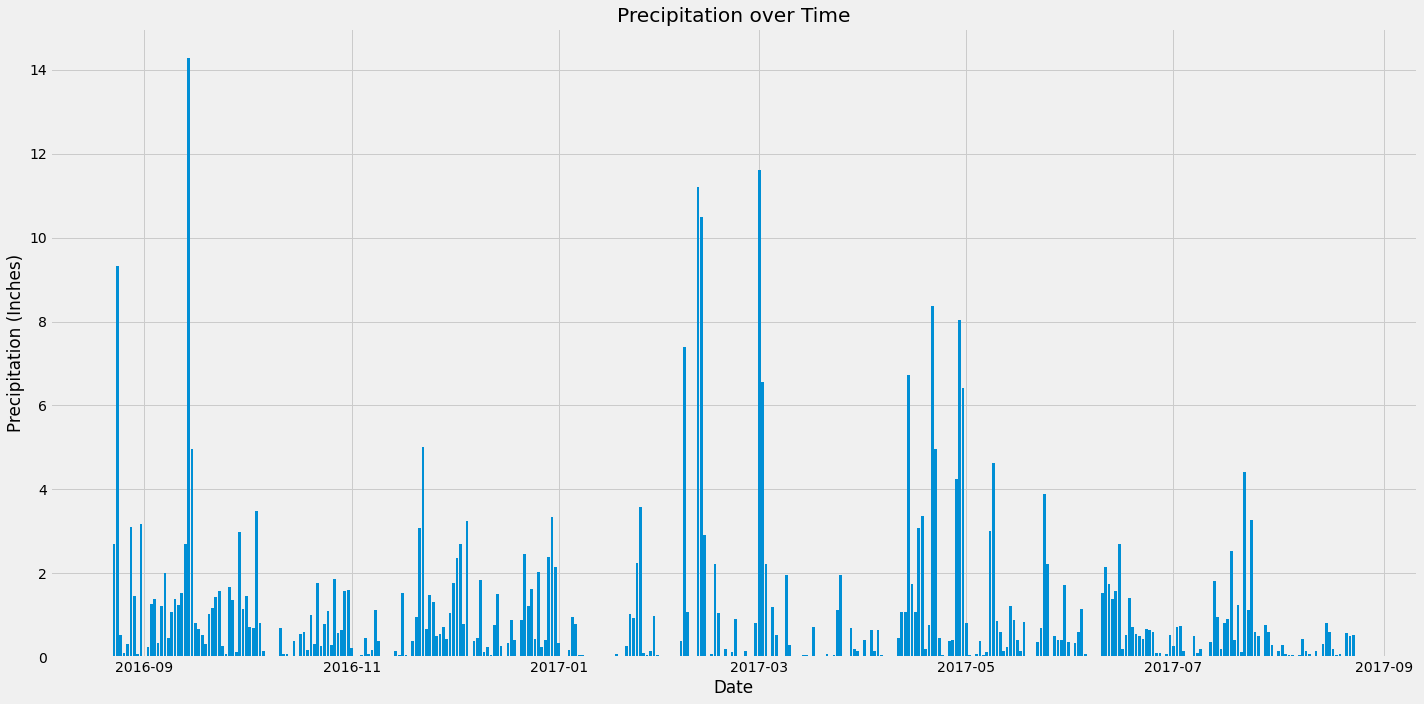

In [14]:
import matplotlib.dates as mdates
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= twelve_months_ago).all()
last_12_months

# Save the query results as a Pandas DataFrame and set the index to the date column
weather_prcp_df = pd.DataFrame(last_12_months)
weather_prcp_df["date"] = pd.to_datetime(weather_prcp_df["date"])


weather_prcp_df = weather_prcp_df.rename(columns = {"prcp": "Precipitation", "date" : "Date"})

weather_prcp_df.set_index("Date")

# weather_prcp_df.dtypes
weather_prcp_df["Date"].nunique()
weather_prcp_df["Date"].count()

# Sort the dataframe by date
weather_prcp_df = weather_prcp_df.groupby(["Date"]).sum()
weather_prcp_df = weather_prcp_df.sort_values(by=["Date"], ascending = True)
weather_prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(weather_prcp_df.index.values, weather_prcp_df["Precipitation"])
plt.title("Precipitation over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")

plt.tight_layout()
plt.savefig("precipitation_analysis.jpg")

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
weather_summary = pd.DataFrame({"Mean": weather_prcp_df["Precipitation"].mean(),
                                "Median" : weather_prcp_df["Precipitation"].median(),
                                "Variance": weather_prcp_df["Precipitation"].var(),
                                "Standard Deviation": weather_prcp_df["Precipitation"].std(),
                                "Standard Error of Mean": weather_prcp_df["Precipitation"].sem()},
                               index = [f"Precipitation from {twelve_months_ago} to {latest_date}"]
                              )

weather_summary


,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Precipitation from 2016-08-23 to 2017-08-23,0.978907,0.405,3.155417,1.776349,0.092851


In [16]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station.station).count()
num_stations

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
                order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
data_from_most_active = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Station.station  == active_stations[0].station).all()
data_from_most_active

[('USC00519397', 53.0, 87.0, 73.09795396419437)]

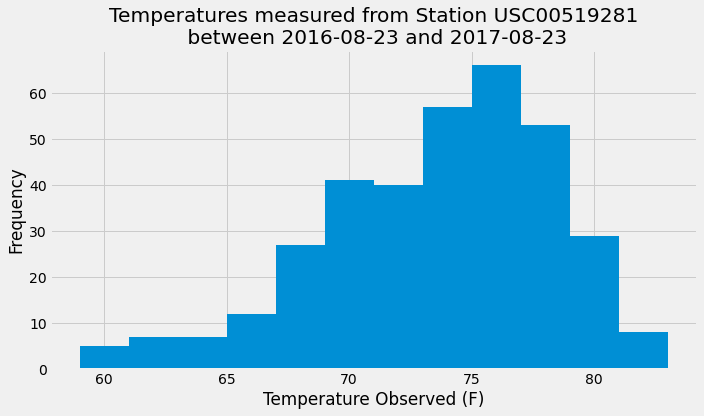

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_most_tobs = active_stations[0].station
station_last_12_months = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.station == station_most_tobs).\
                                     filter(Measurement.date >= twelve_months_ago).all())

station_last_12_months.head()

histo = station_last_12_months.hist(bins=12, figsize=(10, 6))
plt.xlabel("Temperature Observed (F)")
plt.ylabel("Frequency")
plt.title(f"Temperatures measured from Station {station_most_tobs}\n between {twelve_months_ago} and {latest_date}")

plt.tight_layout()
plt.savefig(f"station_{station_most_tobs}_analysis.jpg")

## Bonus Challenge Assignment

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
